# Introduction to statistics for Geoscientists (with Python)
### Lecturer: Dr Alan R.T. Spencer | [alan.spencer@imperial.ac.uk](mailto:alan.spencer@imperial.ac.uk)
### Lecture 3: Hypothesis testing
### URL: [https://github.com/alanspencer/IntroductionToStatsForGeoscientists](https://github.com/alanspencer/IntroductionToStatsForGeoscientists)


## Inferential statistics

Given the data below how do we answer questions such as - is the grain size higher in deposit B than deposit A?

![grain size](https://github.com/alanspencer/IntroductionToStatsForGeoscientists/blob/master/images/example-grain-size.png?raw=true)

Interested in whether energy levels were different in deposits A and B. This will bear on theories of how they formed. The sample from B has a higher mean, but is this just chance variation?

To answer this question we:

* Formulate formal hypotheses.
* Apply approperiate statistical hypothesis test.

## Hypotheses

We formulate two hypotheses:
The *null hypothesis* (H0):

> *There is no difference in mean maximum grain size for samples obtained from deposits A and B.*

...and an *alternative hypothesis* (H1):

> *The mean maximum grain size is higher in sample B than it is in sample A.*

Only accept H1 if it is very unlikely that H0 can explain our observations - otherwise reject H1.

## Testing hypotheses

Many different types of statistical tests exist:

* To test different types of hypothesis.
* To handle different types of data.

### Student’s T-test

[The t-statistic was introduced in 1908 by William Sealy Gosset, a chemist working for the Guinness brewery in Dublin, Ireland ("Student" was his pen name).](http://en.wikipedia.org/wiki/Student%27s_t-test) Student’s T-test accesses the probability that two samples have same underlying mean. Python provides the method
[scipy.stats.ttest_ind](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html). This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances.

* Takes two arrays of values (i.e. two samples).
* Returns *t-statistic*, describing how different means are.
* Returns *p-value*, tells you the probability of observing what we did if the null hypothesis is true.

In the above grain size example the t-statistic and p-values are -1.1 and 0.28 respectively. **Is a probability of 0.28 enough to reject H0?**

In [13]:
# Again lets do a trivial example to make sure we know what's going on there. 
import scipy.stats as stats

# Generate two random datasets with a normal distribution and the same mean.
d1 = stats.norm.rvs(size=100000)
d2 = stats.norm.rvs(size=100000)

# ttest_ind is a two-sided test for the null hypothesis that 2 independent samples
# have identical average (expected) values.
t_statistic, p_value = stats.ttest_ind(d1, d2)
print ("t-statistic = ", t_statistic)
print ("p-value = ", p_value)

t-statistic =  0.10000187704701417
p-value =  0.9203429354822512


## P-value

The p-value is used to determine the likelihood of the null hypothesis were true - it is the probability of observing a more extreme test statistic in the direction of the alternative hypothesis. For example, if the p-value is very small, then it the null hypothesis is "unlikely." If the p-value is larger than some preset threshold, then it is considered "likely."

Therefore, if the p-value is less than (or equal to) $\alpha$, then the null hypothesis is rejected in favor of the alternative hypothesis. And, if the P-value is greater than $\alpha$, then the null hypothesis is not rejected. Commonly the threshold is set at $p=0.05$, but it is arbitrary!

The steps involved in using the P-value approach to conducting any hypothesis test are:

* Specify the null and alternative hypotheses and choose the appropriate test.
* Decide the significance level for the p-value, $\alpha$.
* Calculate the value of the test statistic and the p-value.
* Consider, if the null hypothesis is true, what is the probability that we'd observe a more extreme test statistic in the direction of the alternative hypothesis than we did? Note how this question is equivalent to the question answered in criminal trials: "If the defendant is innocent, what is the chance that we'd observe such extreme criminal evidence?"
* If the p-value is less than (or equal to) $\alpha$, reject the null hypothesis in favor of the alternative hypothesis. Otherwise, accept the null hypothesis.

> In 2012 chances are that you heard in the news the discovery of the Higgs boson. The phrase *five-sigma* was used to describe the strength of the discovery. This is a p-value of 3x10$^{-7}$. [Read more.](http://blogs.scientificamerican.com/observations/five-sigmawhats-that/)

In the grain size example above the p-value is 0.28, which is far above the 0.05 significant level. Therefore, the result said to be *not significant* - not enough evidence to reject H0.

## Tails and significance levels

**One-tailed test**: Form hypothesis H1: *The mean maximum grain size is higher in sample B than it is in sample A*. Now we are testing whether the mean of B is greater than mean of A, not different to the mean of A.

The figure below illustrates the distribution of all possible t-values - the result is significant if value falls into blue region.		

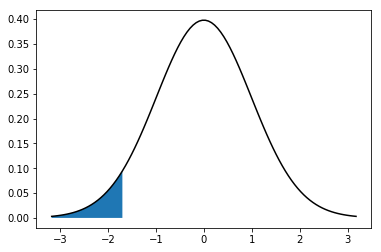

In [14]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
df = n-1
x = np.linspace(stats.t.ppf(0.001, df), stats.t.ppf(0.999, df), n)
p = stats.t.pdf(x, df)

plt.plot(x, p, 'k')
plt.fill_between(x, 0, p, interpolate=True,
                 where=(x<=stats.t.ppf(0.05, df)))
plt.show()

**Two-tailed test**: Form hypothesis H1: *The mean maximum grain size is different in the two samples*. There are two possible ways it can be different - higher than *or* lower than. Two-tailed test has two *significance regions* - one in each tail - each half size of one-tailed significance region.

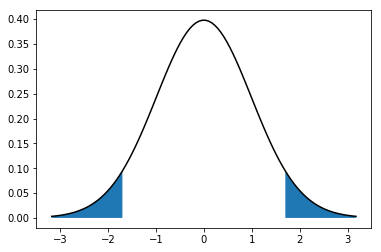

In [15]:
plt.plot(x, p, 'k')
plt.fill_between(x, 0, p, interpolate=True,
                 where=((x<=stats.t.ppf(0.05, df)) | (x>=stats.t.ppf(0.95, df))))
plt.show()

### Tails in practice

1. Decide if your test is one or two-tailed BEFORE doing it!
2. Values returned by [scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html) functions (e.g. [ttest_ind](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind)) are for two-tailed tests (mostly!)
  1. If your test is two-tailed, there is no issue
  2. If test is one-tailed, halve the p-value before interpreting it.
In the example above the p-value was 0.28, but this is a two-tailed value while the test was one-tailed. The actual value for the test was 0.14. In this case it is still not significant (>0.05) but halving could easily make all the difference.

## More on the t-test.

The T-test is the most widely used statistical test, but not always appropriate. It makes several assumptions.

* Sensible results need reasonably large sample sizes.
  * This applies to other tests too.
* Assumes data in samples is normally distributed:
  * May or may not really be true.
  * If not, consider using non-parametric tests. 

## Non-parametric equivalents

The most commonly used non-parametric test is the [Mann-Whitney U test](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html#scipy.stats.mannwhitneyu).

* Uses ranks of data (like Spearman’s correlation).
* Does not require distributions of data to be normal.
* Less powerful test (more false negatives) if distributions are normal (as all non-parametric tests).

When a mathematical model is available the [Kolmorogov-Smirnov (K-S) test](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html#scipy.stats.kstest) is commonly used.

* K-S test is for ‘goodness of fit’ – how well a distribution fits a mathematic model.
* ‘Two-sample’ K-S test variant can be used as a non-parametric alternative to a t-test.
* Tests more than just difference in means - tests other aspects of distribution shape.
* Use to answer questions like 'do these two samples seem to come from the same underlying population'?

## Correlation hypothesis tests

We have already seen that that p-values can be obtained for correlations (Pearson or Spearman). We can test hypotheses of correlation with these.

* H0 : ‘Dorset mark and end-of-year mark are not related’
* H1 : ‘There is a correlation between Dorset mark and end-of-year Mark’

This is a two-tailed test and we will use a 5% significance level.

* Pearson R is 0.27, p=0.014 --- significant, therefore reject H0 in favor of H1.
* Spearman R is 0.19, p=0.087 --- not significant, therefore accept H0.

So, if we can use Pearson we can accept H1, but with Spearman we cannot - not enough evidence. We need to do a better job of deciding which to use!
			

## Tests of normality

Rather than guessing whether a distribution is normal, can we test for it instead?

Yes - it just becomes another hypothesis test:

* $H_0$ : 'Underlying distribution is normal.'
* $H_1$ : 'Underlying distribution is not normal.'

Many different tests of normality exist - no universal agreement on which is best. A good solution is *D’Agostino & Pearson combined test*, provided by Python via the method [scipy.stats.normaltest](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html). This function tests the null hypothesis that a sample comes from a normal distribution.

This is also a good opportunity to clearly illustrate the use of the p-value using two very clear test cases.  

Populating the interactive namespace from numpy and matplotlib


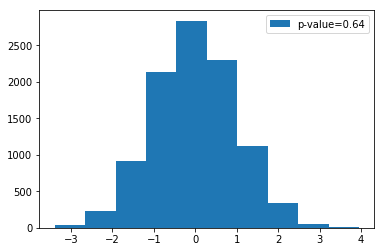

In [16]:
import numpy as np
from scipy import stats
import pylab as pl
%pylab inline

# Create a normal distribution.
values = stats.norm.rvs(size=10000)
statistic, pvalue = stats.normaltest(values)
pl.hist(values)
pl.legend(("p-value=%.2g"%pvalue, ))
pl.show()

In [17]:
# However, notice how it varies for different sets of data.
# Even with perfect data you can get false positives!
for i in range(10):
    values = stats.norm.rvs(size=1000)
    statistic, pvalue = stats.normaltest(values)
    print (i, "p-value = ", pvalue)

0 p-value =  0.1298142448662146
1 p-value =  0.7938025160778097
2 p-value =  0.06131821325405183
3 p-value =  0.2496322829144195
4 p-value =  0.9204031819176489
5 p-value =  0.29624687669047084
6 p-value =  0.5672211397065825
7 p-value =  0.4624718293874649
8 p-value =  0.06174814304603718
9 p-value =  0.826227607934547


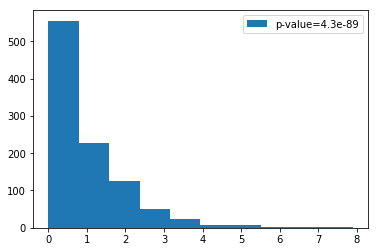

In [18]:
# However, the degree of varability for the p-value is put into context
# when you compare it with other kinds of distributions - e.g. the exponential distribution.
values = stats.expon.rvs(size=1000)
statistic, pvalue = stats.normaltest(values)
pylab.hist(values)
pylab.legend(("p-value=%.2g"%pvalue, ))
pylab.show()

# Demo - are the marks distributions normal in first year marks example?

In [20]:
# Read in the records.
record = np.recfromcsv("./data/first_year_marks.csv") 

print (record.dtype.names)

('field_mark', 'overall_year')


Skew =  11.90871817961577
H0 - field marks come from a normal distribution: 
Reject in favor of H1.


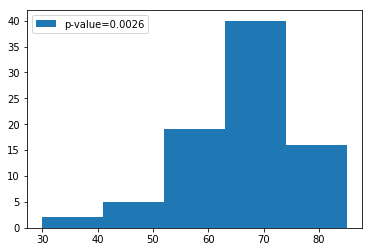

In [23]:
field_mark = np.array(record["field_mark"], dtype=float)

k2, p = stats.normaltest(field_mark)
print ("Skew = ", k2)
print ("H0 - field marks come from a normal distribution: ")
if p<0.05:
    print ("Reject in favor of H1.")
else:
    print ("Accept.")

pl.hist(field_mark, bins=5)
pl.legend(("p-value=%.2g"%p, ))
pl.show()

Skew =  0.0402331177377869
H0 - overall year marks come from a normal distribution: 
Accept.


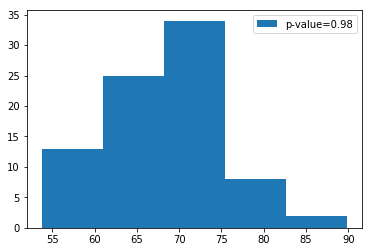

In [24]:
overall_year = np.array(record["overall_year"], dtype=float)

k2, p = stats.normaltest(overall_year)
print ("Skew = ", k2)
print ("H0 - overall year marks come from a normal distribution: ")
if p<0.05:
    print ("Reject in favor of H1.")
else:
    print ("Accept.")

pl.hist(overall_year, bins=5)
pl.legend(("p-value=%.2g"%p, ))
pl.show()

As at least one of these datasets does not have a normal distribution we should use Spearman's correlation test.

# Exercise 7.1: Hypothesis Testing

1. I have two sets of trilobite fossils from different localities. I think they are from the same species but want some quantitative confirmation – on the basis of their mean length:width ratio ([triloshape1.csv](https://raw.githubusercontent.com/alanspencer/IntroductionToStatsForGeoscientists/master/data/triloshape1.csv), [triloshape2.csv](https://raw.githubusercontent.com/alanspencer/IntroductionToStatsForGeoscientists/master/data/triloshape2.csv)) is there evidence that they are different?
2. I have measured mica percentages in samples of igneous rocks from two different localities ([micapercent1.csv](https://raw.githubusercontent.com/alanspencer/IntroductionToStatsForGeoscientists/master/data/micapercent1.csv), [micapercent2.csv](https://raw.githubusercontent.com/alanspencer/IntroductionToStatsForGeoscientists/master/data/micapercent2.csv)). The mean mica percentage is lower in the second locality and I have a geological theory that may explain this, but I first need to rule out the possibility that the lower mica content is just due to chance.

In each case construct (i.e. actually write down) your two hypotheses, decide from how they are worded whether they are one-tailed or two-tailed, then use your program to assess which you should accept.

Hints:

* Test data sets for normality (i.e. do they have  normal distribution). Use the D’Agostino & Pearson test to provide probabilities of normality.
* Test whether their means differ significantly. When testing if the means are different you should use use either a two-tailed Mann-Whitney p value, or a two-tailed T-test p value depending on the result of the normality test. Remember that the scipy.stats Mann-Whitney function returns a one-tailed p-value.



In [ ]:
# Solution here

# Practical 7.2: Kolmogorov-Smirnov Test

* Use the triolbite data above and perform a two-sided Kolmogorov-Smirnov test (two samples) on whether they come from the same distribution, or not.
* Test whether each trilobite data comes from an exponential distribution or not. (You will need to generate an exponential distribution for this question, and normalise all the distributions first)

**NB** : The necessary function CAN be found in scipy.stats [here](http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html)

## BONUS (Harder)

* Plot the cumulative distribution functions (CDF) for the trilobite data in one figure as linegraphs.
* Plot an exponential CDF on top of this as well (with a dashed line)
* Was there ever any suspicion the data might be exponential?

**HINT** histograms have a cumulative argument which you can make use of.

In [ ]:
# Solution here